In [80]:
#Importando pacotes que serão utilizados para a resolução do exercício
import numpy as np
import networkx as ntx
import matplotlib.pyplot as plt
import random
import matplotlib
from networkx.algorithms import tree
from itertools import combinations, product
from math import comb

A soma dos graus de todos os vértices de um grafo G é duas vezes o número de arestas
Dado o grafo $G(V,E)$
$$
\sum_{v \in V}{G(v)} = 2 . |E|
$$

Se queremos que $ |E| = 2|N| $, então, um grafo com todos os vértices de mesmo grau $degree(G)$:

$$
|N|degree(G) = 2 . 2|N|

\implies degree(G) = 4
$$

Para facilitar o processo de criação de grafos aleatórios, irá ser considerado que cada vértice possui um grau maior que $4$

In [62]:
#função gera um grafo completo com arestas de caminhos aleatórios
def get_distance(x1,x2,y1,y2):
    dist = ((x1 - x2)**2 + (y1- y2)**2)**(1/2)
    return dist

def generate_random_graph(n, max_degree, seed=10):
    if(max_degree > n):
        raise Exception("O grau máximo deve ser menor que o número de vértices")

    random.seed(seed)
    expected_degree = random.randint(4,max_degree)
    
    G = ntx.expected_degree_graph(list(np.ones(n)*expected_degree), seed=None, selfloops=False)
    #Transforma em um grafo não ordenado
    ntx.to_undirected(G)

    #Atribui uma coordenada aleatória x e y
    for node in ntx.nodes(G):
        ntx.set_node_attributes(G,{node:{"pos":(random.uniform(0,5),random.uniform(0,5))}})
         
    #Atribui uma distância a cada ponto
    for edge in ntx.edges(G):
        ntx.set_edge_attributes(G,{edge:{"distance":round(get_distance(G.nodes[edge[0]]['pos'][0], G.nodes[edge[1]]['pos'][0], G.nodes[edge[0]]['pos'][1], G.nodes[edge[1]]['pos'][1]),2),"cmap":0.25}})
        
    return G

In [97]:
#Função desenha um grafo
def draw_graph(
    G,
    modified = False,
    path_list = [],
    layout='circular',
    show_arrows = True,
    has_path = True,
    custom_edges=[],
    title = ''):
    f,ax = plt.subplots(figsize=(8,6))

    pos = ntx.get_node_attributes(G,'pos')

    #Determina as posições de cada vértice
    x = []
    y = []

    for i in range(len(pos)):
        x.append(pos[i][0])
        y.append(pos[i][1])


    # #Desenha as arestas de acordo com o problema
    if not modified:
        ntx.draw_networkx_edges(G, pos=pos, edge_color='dimgray',alpha=0.35)
    else:
        # edge_labels = ntx.get_edge_attributes(ntx.to_directed(G.subgraph(path_list)), "distance")
        edge_labels = dict([((tuple(e1), G[e1[0]][e1[1]]["distance"]))
                    for e1 in custom_edges])
        # del edge_labels[(path_list[0],path_list[-1])]
        # del edge_labels[(path_list[-1],path_list[0])]
        ntx.draw_networkx_edges(G.subgraph(path_list),pos=pos, edgelist=custom_edges, edge_color='r', label='distance')
        ntx.draw_networkx_edge_labels(G.subgraph(path_list), pos, edge_labels, rotate =False)
    #Plota cada vértice
    plt.scatter(x,y,edgecolor={'black'})

    #Adiciona o nome em cima de cada vértice
    eps=0.04
    for i, txt in enumerate(range(len(pos))):
        plt.annotate(txt, (x[i]+eps, y[i]+eps), color='blue')

    plt.title(title)
    
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    ax.grid(True)
    plt.show()

In [98]:
def get_random_list_of_edges(n):
    if comb(n,2) < n*3:
        return list(combinations(range(n), r = 2))
    else:
        return random.sample(list(combinations(range(n), r = 2)),3*n)

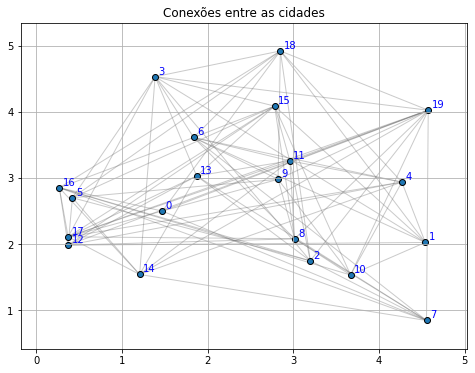

In [99]:
n = 20
n_max_arestas = 8

G = generate_random_graph(n, n_max_arestas, seed=10)
draw_graph(G, title='Conexões entre as cidades')
g_random_edges = get_random_list_of_edges(n)

min_distance = []
for edge in g_random_edges:
    min_distance.append({"edge":edge,"min_dist":ntx.dijkstra_path_length(G,edge[0],edge[1],weight='distance')})
    

In [100]:
#Aplicando o método de dijkstra
random_edge_list= get_random_list_of_edges(n)

min_distance = []
for edge in random_edge_list:
    res = round(ntx.dijkstra_path_length(G,edge[0], edge[1],weight='distance'),2)
    min_distance.append(res)
    if G.has_edge(edge[0], edge[1]):
        G[edge[0]][edge[1]].update({"distance": round(res,2)})
    else:
        G.add_edge(edge[0], edge[1], distance = round(res,2))

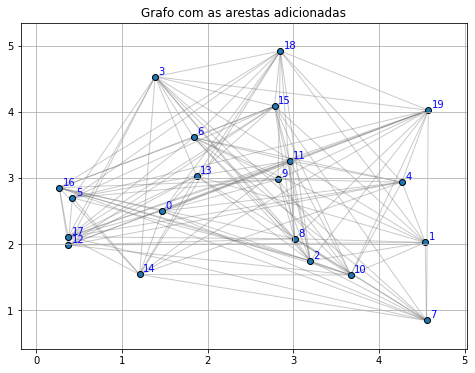

In [101]:
draw_graph(G,title = "Grafo com as arestas adicionadas")

In [102]:
def prim(G):
  E = tree.minimum_spanning_edges(G, algorithm="prim", data=False)
  edges = list(E)
  sorted_edges = sorted(sorted(x) for x in edges)
  return sorted_edges

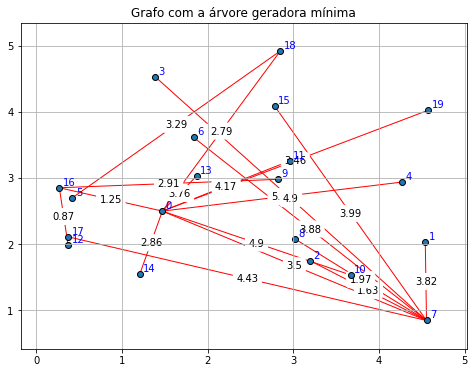

In [103]:
E = prim(G)
draw_graph(G, modified=True, path_list= list(G.nodes), custom_edges=E, title="Grafo com a árvore geradora mínima")